**1. XOR Gate Classification**

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

weights = np.zeros(2)
bias = 0.0

def activation(x):
    return 1 if x >= 0 else 0

learning_rate = 0.5
epochs = 100

for epoch in range(epochs):
    for i in range(len(X)):
        weighted_sum = np.dot(X[i], weights) + bias
        prediction = activation(weighted_sum)
        error = y[i] - prediction
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print(f"Trained weights: {weights}, Trained bias: {bias}")

for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias
    prediction = activation(weighted_sum)
    print(f"Input: {X[i]} = Predicted: {prediction}, Actual: {y[i]}")


Trained weights: [-0.5  0. ], Trained bias: 0.0
Input: [0 0] = Predicted: 1, Actual: 0
Input: [0 1] = Predicted: 1, Actual: 1
Input: [1 0] = Predicted: 0, Actual: 1
Input: [1 1] = Predicted: 0, Actual: 0


Here we can see that the ouputs generated from the XOR truth table and compare them with the actual output that was supposed to be generated. There is a big difference between the values generated.

A Single Layer Perceptron struggles to classify the XOR gate because the XOR problem is not linearly separable. The inputs for XOR can't be divided by a single straight line in the input space. In XOR, the output is 1 when the inputs are different, and 0 when they are the same, which requires a more complex decision boundary that a single perceptron cannot create.

**XOR using Multi Layer Perceptron(MLP)**

In [13]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', max_iter=5000, random_state=42)

model.fit(X, y)

predictions = model.predict(X)
print(f"Input: {X}")
print(f"XOR Predicted: {predictions}")
print(f"XOR Actual: {y}")

Input: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
XOR Predicted: [0 1 1 0]
XOR Actual: [0 1 1 0]


**2. Sentiment Analysis Using ANN on IMDb Movie Reviews**

**Data Preprocessing**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.metrics import Accuracy
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [45]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
data = pd.read_csv('IMDB.csv')

print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [48]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)


Apply preprocessing to 'review' column

In [50]:
data['processed_review'] = data['review'].apply(preprocess_text)

In [51]:
# Encode sentiment labels
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Check class balance
print(data['sentiment'].value_counts(normalize=True))

sentiment
0    0.553648
1    0.446352
Name: proportion, dtype: float64


In [52]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_review']).toarray()
y = data['sentiment'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Build model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.4980 - loss: 7.9159 - val_accuracy: 0.4211 - val_loss: 6.8150
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6166 - loss: 6.6218 - val_accuracy: 0.4211 - val_loss: 5.7112
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5961 - loss: 5.5465 - val_accuracy: 0.4211 - val_loss: 4.8076
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6020 - loss: 4.6667 - val_accuracy: 0.4211 - val_loss: 4.0816
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5844 - loss: 3.9625 - val_accuracy: 0.4211 - val_loss: 3.5080
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5864 - loss: 3.4055 - val_accuracy: 0.4211 - val_loss: 3.0623
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5922 - loss: 2.9672 - val_accuracy: 0.4211 - val_loss: 2.7199
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6078 - loss: 2.6291 - val_accuracy: 0.4211 - val_loss

In [56]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7285 - loss: 0.8201
Test Loss: 0.8423048257827759, Test Accuracy: 0.7021276354789734


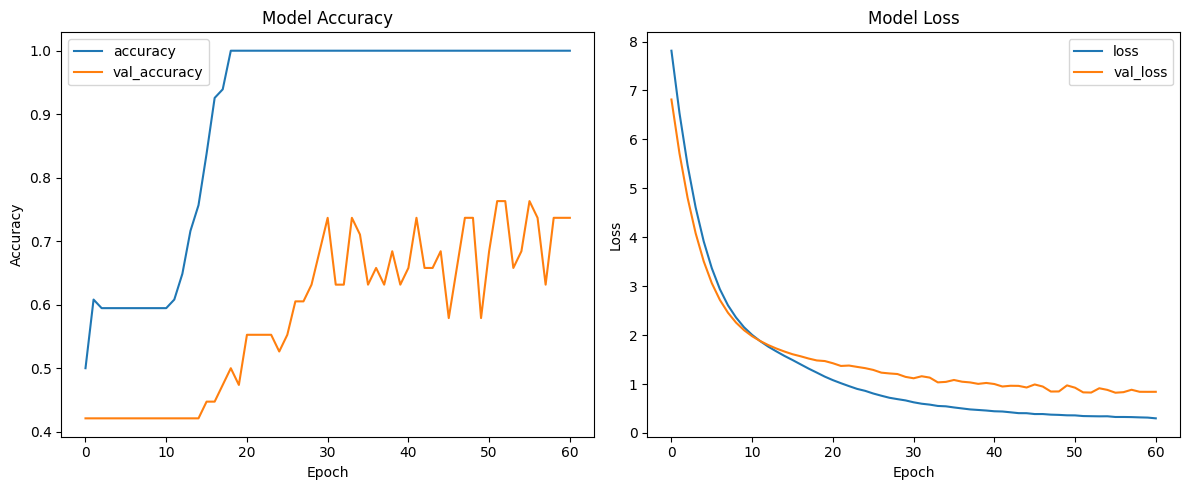

In [57]:

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.tight_layout()
plt.show()

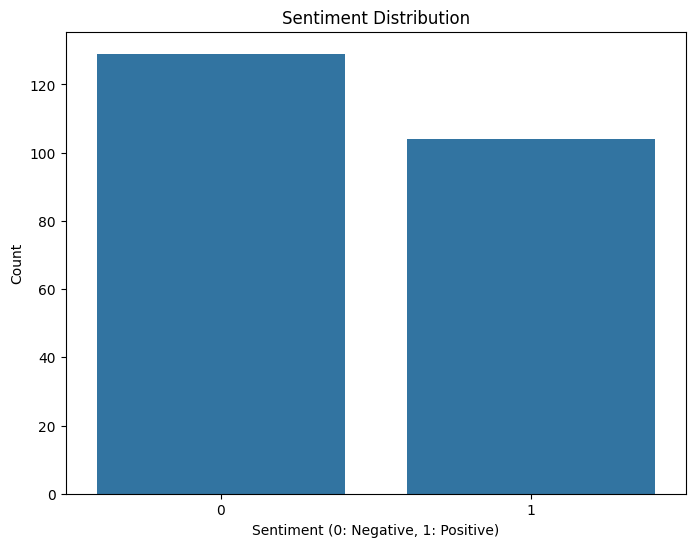

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [58]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

ReLU Activation Function:

Non-linearity: ReLU introduces non-linearity into the model, allowing it to learn complex patterns in the data.

Computational Efficiency: ReLU is computationally efficient compared to other activation functions like sigmoid or tanh because it does not involve exponential calculations.

Avoiding Vanishing Gradient Problem: Unlike sigmoid and tanh, ReLU does not saturate in positive regions, mitigating the vanishing gradient problem.

Sigmoid Activation Function:

Output Interpretation: Sigmoid outputs a probability score between 0 and 1, making it suitable for binary classification tasks.

Binary Classification: The sigmoid function maps the output to a range that can be interpreted as class probabilities.

Binary Cross-Entropy Loss:

Suitability: Binary cross-entropy is appropriate for binary classification tasks as it measures the difference between the predicted probabilities and the true labels.

Gradient Descent Optimization: It provides smooth gradients, which help in the efficient training of the model using gradient descent methods.